# Assignment: Trees
Do three questions.

**Q1.** Please answer the following questions in your own words.

1. How are trees constructed?

**Trees are constructed by splitting the data based on if it fits into a classification/grouping or not. The splits continue on until the data is grouped in way where there are minimal differences between the data that form the different groups.**

2. How do trees handle non-linear relationships between variables? Compare this to linear models.
**Trees handle non-linear relationships between variables through the structure created by the splits, as it allows for non-linear relationships and linear ones to be displayed. Compared to linear models, trees are preferable for non-linear relationships as linear models must be adjusted.**

3. Why is the Gini a good loss function for categorical target variables?
**The Gini is a good loss function for categorical target variables because it provides a numerical quantification for the chance that a data set is mis-classified with the current splits in the tree.**
4. Why do trees tend to overfit, and how can this tendency be constrained?
**Trees tend to overfit as it is extremely easy to simply make a tree continue splitting and classifying until all the data is 100% in the right group/category. This tendency can be constrained by setting limits on how many splits a tree can have, forcing it to maintain some level of impurity, or setting constraints on how small a category is allowed to be.**
5. True or false, and explain: Trees only really perform well in situations with lots of categorical variables as features/covariates.
**False, because trees do not necessarily need a ton of categorical variables to perform well. Continuous variables actually would allow the tree to make more splits so categorical is not a requirment.**
6. Why don't most versions of classification/regression tree concept allow for more than two branches after a split?
**Most versions of classification/regression tree concepts don't allow for more than two branches after a split as a way to combat overfitting which could easy occurr if one split was allowed to result in many branches.**
7. What are some heuristic ways you can examine a tree and decide whether it is probably over- or under-fitting?
**Some heuristic ways to examine a tree and decide whether it is probably over- or under-fitting include examining the total number of splits occurring in the tree and looking at the number of data points that are included in each final bin/category.**

**Q2.** This is a case study on regression and classification trees.

1. Load `./data/cars_hw.csv`. How many observations and features/covariates/variables? What are the available variables? Take a look at the first few rows of data.

2. For the categorical variables `Make`, `Color`, `Body_type`, `No_of_Owners`, `Fuel_Type`, `Transmission`, and `Transmission_Type`, create dummy/one-hot-encoded representations. For numeric variables, we'll use `Mileage_Run`, `Make_Year`, and `Seating_Capacity`. Our target variable will be `Price`. Make a train-test split of your data.

3. From `sklearn.tree`, import the `DecisionTreeRegressor` and `plot_tree`. Use a train-test split to iterate over possible values for `min_samples_leaf`, computing the $R^2$ for each value between 1 and 25. What choice achieves the highest $R^2$ on the test data?

4. For the optimal `min_samples_leaf` from 3, regress price on the rest of the features/covariates using the training data. What is your $R^2$ and RMSE on the test set? Plot the dendrogram. Plot the residuals. Is the density of residuals symmetric and centered around 0?

4. Run a linear regression of price on the same variables. Which model -- regression tree or linear regression -- performs better on the test set? Why?

5. Predict prices using both your tree and your linear model, and make a scatter plot of their values. Describe what you see.

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
cars = pd.read_csv('/content/cars_hw (1).csv')
cars.head()

,Unnamed: 0,Make,Make_Year,Color,Body_Type,Mileage_Run,No_of_Owners,Seating_Capacity,Fuel_Type,Transmission,Transmission_Type,Price
0,1,Volkswagen,2017,silver,sedan,44611,1st,5,diesel,7-Speed,Automatic,657000
1,2,Hyundai,2016,red,crossover,20305,1st,5,petrol,5-Speed,Manual,682000
2,3,Honda,2019,white,suv,29540,2nd,5,petrol,5-Speed,Manual,793000
3,4,Renault,2017,bronze,hatchback,35680,1st,5,petrol,5-Speed,Manual,414000
4,5,Hyundai,2017,orange,hatchback,25126,1st,5,petrol,5-Speed,Manual,515000


In [4]:
cars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 976 entries, 0 to 975
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Unnamed: 0         976 non-null    int64 
 1   Make               976 non-null    object
 2   Make_Year          976 non-null    int64 
 3   Color              976 non-null    object
 4   Body_Type          976 non-null    object
 5   Mileage_Run        976 non-null    int64 
 6   No_of_Owners       976 non-null    object
 7   Seating_Capacity   976 non-null    int64 
 8   Fuel_Type          976 non-null    object
 9   Transmission       976 non-null    object
 10  Transmission_Type  976 non-null    object
 11  Price              976 non-null    int64 
dtypes: int64(5), object(7)
memory usage: 91.6+ KB


There are 976 observations with 10 features not including our target feature of price. There is also a column that is purely counting all the observations.

2. For the categorical variables Make, Color, Body_type, No_of_Owners, Fuel_Type, Transmission, and Transmission_Type, create dummy/one-hot-encoded representations. For numeric variables, we'll use Mileage_Run, Make_Year, and Seating_Capacity. Our target variable will be Price. Make a train-test split of your data.

In [5]:
cars = pd.get_dummies(cars, columns=['Make', 'Color', 'Body_Type', 'No_of_Owners', 'Fuel_Type', 'Transmission', 'Transmission_Type'])

In [6]:
cars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 976 entries, 0 to 975
Data columns (total 54 columns):
 #   Column                       Non-Null Count  Dtype
---  ------                       --------------  -----
 0   Unnamed: 0                   976 non-null    int64
 1   Make_Year                    976 non-null    int64
 2   Mileage_Run                  976 non-null    int64
 3   Seating_Capacity             976 non-null    int64
 4   Price                        976 non-null    int64
 5   Make_Chevrolet               976 non-null    bool 
 6   Make_Datsun                  976 non-null    bool 
 7   Make_Ford                    976 non-null    bool 
 8   Make_Honda                   976 non-null    bool 
 9   Make_Hyundai                 976 non-null    bool 
 10  Make_Jeep                    976 non-null    bool 
 11  Make_Kia                     976 non-null    bool 
 12  Make_MG Motors               976 non-null    bool 
 13  Make_Mahindra                976 non-null    bool 

In [7]:
from sklearn.model_selection import train_test_split

In [8]:
x = cars.drop(columns=['Price'])
y = cars['Price']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

3. From sklearn.tree, import the DecisionTreeRegressor and plot_tree. Use a train-test split to iterate over possible values for min_samples_leaf, computing the  R2  for each value between 1 and 25. What choice achieves the highest  R2  on the test data?

In [9]:
from sklearn.tree import DecisionTreeRegressor, plot_tree

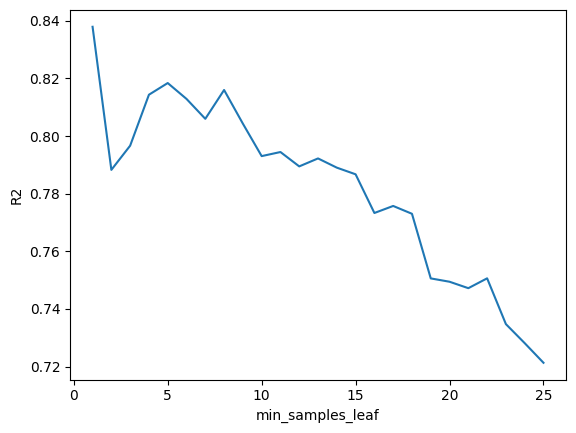

In [10]:
min_samples_leaf_size = range(1, 26)
r2_scores = []

for min_samples_leaf in min_samples_leaf_size:
  cart = DecisionTreeRegressor(min_samples_leaf=min_samples_leaf, random_state=42)
  cart.fit(x_train, y_train)
  cart.score(x_test, y_test)
  r2_scores.append(cart.score(x_test, y_test))

plt.plot(min_samples_leaf_size, r2_scores)
plt.xlabel('min_samples_leaf')
plt.ylabel('R2')
plt.show()

Having a min_samples_leaf of 1 resulted in the highest R2 on the test data (near 0.84).

4. For the optimal min_samples_leaf from 3, regress price on the rest of the features/covariates using the training data. What is your  R2  and RMSE on the test set? Plot the dendrogram. Plot the residuals. Is the density of residuals symmetric and centered around 0?

R2: 0.837904448092099
RMSE: 136351.11862768274


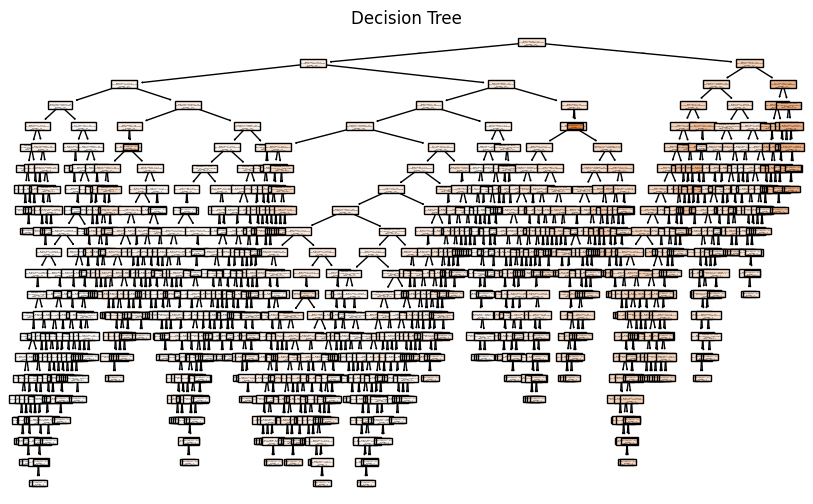

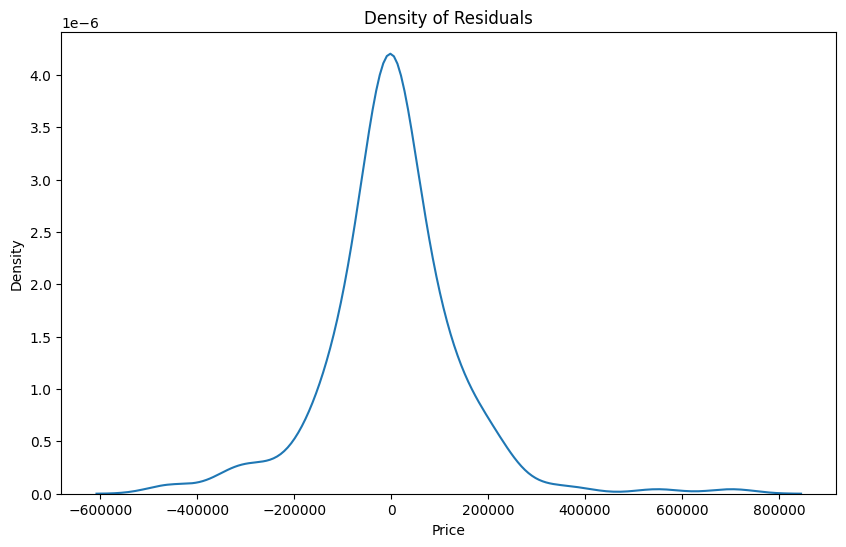

In [33]:
cart = DecisionTreeRegressor(min_samples_leaf=1, random_state=42)
cart.fit(x_train, y_train)
y_hat = cart.predict(x_test)
print('R2:', cart.score(x_test, y_test))
print('RMSE:', np.sqrt(np.mean((y_test - y_hat)**2)))

var_names = cart.feature_names_in_
plt.figure(figsize = (10, 6))
plot_tree(cart, filled = True, feature_names = var_names)
plt.title('Decision Tree')
plt.show()

residuals = y_test - y_hat

plt.figure(figsize = (10, 6))
sns.kdeplot(residuals)
plt.title('Density of Residuals')
plt.show()

The density of the residuals appears to be symmetric and centered around 0.

5. Run a linear regression of price on the same variables. Which model -- regression tree or linear regression -- performs better on the test set? Why?

In [12]:
from sklearn.linear_model import LinearRegression

In [13]:
reg = LinearRegression().fit(x_train, y_train)
print('R2:', reg.score(x_test, y_test))

R2: 0.8163910583948997


The regression tree performs better on the test set becuase it has a higher R2 value. This is possibly because the data set is complex and involves non-linear relationships between variables.

6. Predict prices using both your tree and your linear model, and make a scatter plot of their values. Describe what you see.

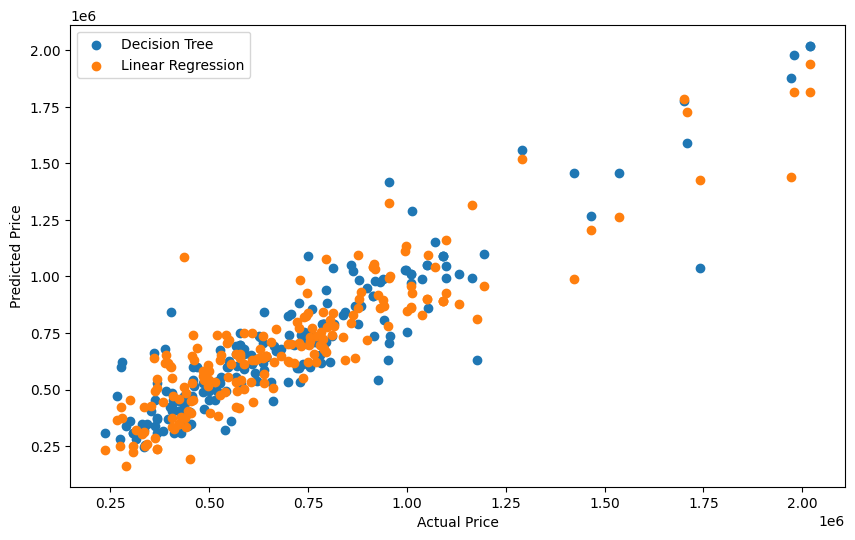

In [14]:
cart_y_hat = cart.predict(x_test)
reg_y_hat = reg.predict(x_test)

plt.figure(figsize = (10, 6))
plt.scatter(y_test, cart_y_hat, label = 'Decision Tree')
plt.scatter(y_test, reg_y_hat, label = 'Linear Regression')
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.legend()
plt.show()

Both models appear to have more tight clustering of the predicted price when the actual price was either on the higher or lower end of the range. Past the very beginning of the prices though the models appear to both provide a wider range of predicted price for the same acutal price. This becomes even more clear when the price increases. Additionally, the higher end of the price range displayed in the histogram appears to maybe be outliers.

**Q3.** This is a case study about classification and regression trees.

1. Load the `Breast Cancer METABRIC.csv` dataset. How many observations and variables does it contain? Print out the first few rows of data.

2.  We'll use a consistent set of feature/explanatory variables. For numeric variables, we'll include `Tumor Size`, `Lymph nodes examined positive`, `Age at Diagnosis`. For categorical variables, we'll include `Tumor Stage`, `Chemotherapy`, and `Cancer Type Detailed`. One-hot-encode the categorical variables and concatenate them with the numeric variables into a feature/covariate matrix, $X$.

3. Let's predict `Overall Survival Status` given the features/covariates $X$. There are 528 missing values, unfortunately: Either drop those rows from your data or add them as a category to predict. Constrain the minimum samples per leaf to 10. Print a dendrogram of the tree. Print a confusion matrix of the algorithm's performance. What is the accuracy?

4. For your model in part three, compute three statistics:
    - The **true positive rate** or **sensitivity**:
        $$
        TPR = \dfrac{TP}{TP+FN}
        $$
    - The **true negative rate** or **specificity**:
        $$
        TNR = \dfrac{TN}{TN+FP}
        $$
    Does your model tend to perform better with respect to one of these metrics?

5. Let's predict `Overall Survival (Months)` given the features/covariates $X$. Use the train/test split to pick the optimal `min_samples_leaf` value that gives the highest $R^2$ on the test set (it's about 110). What is the $R^2$? Plot the test values against the predicted values. How do you feel about this model for clinical purposes?

In [16]:
breast_cancer = pd.read_csv('/content/Breast Cancer METABRIC.csv')
breast_cancer.head()

,Patient ID,Age at Diagnosis,Type of Breast Surgery,Cancer Type,Cancer Type Detailed,Cellularity,Chemotherapy,Pam50 + Claudin-low subtype,Cohort,ER status measured by IHC,...,Overall Survival Status,PR Status,Radio Therapy,Relapse Free Status (Months),Relapse Free Status,Sex,3-Gene classifier subtype,Tumor Size,Tumor Stage,Patient's Vital Status
0,MB-0000,75.65,Mastectomy,Breast Cancer,Breast Invasive Ductal Carcinoma,NaN,No,claudin-low,1.0,Positve,...,Living,Negative,Yes,138.65,Not Recurred,Female,ER-/HER2-,22.0,2.0,Living
1,MB-0002,43.19,Breast Conserving,Breast Cancer,Breast Invasive Ductal Carcinoma,High,No,LumA,1.0,Positve,...,Living,Positive,Yes,83.52,Not Recurred,Female,ER+/HER2- High Prolif,10.0,1.0,Living
2,MB-0005,48.87,Mastectomy,Breast Cancer,Breast Invasive Ductal Carcinoma,High,Yes,LumB,1.0,Positve,...,Deceased,Positive,No,151.28,Recurred,Female,NaN,15.0,2.0,Died of Disease
3,MB-0006,47.68,Mastectomy,Breast Cancer,Breast Mixed Ductal and Lobular Carcinoma,Moderate,Yes,LumB,1.0,Positve,...,Living,Positive,Yes,162.76,Not Recurred,Female,NaN,25.0,2.0,Living
4,MB-0008,76.97,Mastectomy,Breast Cancer,Breast Mixed Ductal and Lobular Carcinoma,High,Yes,LumB,1.0,Positve,...,Deceased,Positive,Yes,18.55,Recurred,Female,ER+/HER2- High Prolif,40.0,2.0,Died of Disease


In [17]:
breast_cancer.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2509 entries, 0 to 2508
Data columns (total 34 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Patient ID                      2509 non-null   object 
 1   Age at Diagnosis                2498 non-null   float64
 2   Type of Breast Surgery          1955 non-null   object 
 3   Cancer Type                     2509 non-null   object 
 4   Cancer Type Detailed            2509 non-null   object 
 5   Cellularity                     1917 non-null   object 
 6   Chemotherapy                    1980 non-null   object 
 7   Pam50 + Claudin-low subtype     1980 non-null   object 
 8   Cohort                          2498 non-null   float64
 9   ER status measured by IHC       2426 non-null   object 
 10  ER Status                       2469 non-null   object 
 11  Neoplasm Histologic Grade       2388 non-null   float64
 12  HER2 status measured by SNP6    19

The breast cancer data set has 2509 observations with 34 variables each.

2. We'll use a consistent set of feature/explanatory variables. For numeric variables, we'll include Tumor Size, Lymph nodes examined positive, Age at Diagnosis. For categorical variables, we'll include Tumor Stage, Chemotherapy, and Cancer Type Detailed. One-hot-encode the categorical variables and concatenate them with the numeric variables into a feature/covariate matrix,  X .

In [43]:
breastcancer = breast_cancer[['Overall Survival Status', 'Tumor Size', 'Lymph nodes examined positive', 'Age at Diagnosis', 'Tumor Stage', 'Chemotherapy', 'Cancer Type Detailed']]

In [44]:
breastcancer = pd.get_dummies(breastcancer, columns=['Tumor Stage', 'Chemotherapy', 'Cancer Type Detailed'])

In [45]:
breastcancer.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2509 entries, 0 to 2508
Data columns (total 19 columns):
 #   Column                                                          Non-Null Count  Dtype  
---  ------                                                          --------------  -----  
 0   Overall Survival Status                                         1981 non-null   object 
 1   Tumor Size                                                      2360 non-null   float64
 2   Lymph nodes examined positive                                   2243 non-null   float64
 3   Age at Diagnosis                                                2498 non-null   float64
 4   Tumor Stage_0.0                                                 2509 non-null   bool   
 5   Tumor Stage_1.0                                                 2509 non-null   bool   
 6   Tumor Stage_2.0                                                 2509 non-null   bool   
 7   Tumor Stage_3.0                                    

In [68]:
breastcancer = breastcancer[breastcancer['Overall Survival Status'].notna()]

In [69]:
X = pd.concat([breastcancer[['Tumor Size', 'Lymph nodes examined positive', 'Age at Diagnosis']], breastcancer.iloc[:, 3:17]], axis = 1)

In [70]:
print(X.shape)

(1981, 17)


3. Let's predict Overall Survival Status given the features/covariates  X . There are 528 missing values, unfortunately: Either drop those rows from your data or add them as a category to predict. Constrain the minimum samples per leaf to 10. Print a dendrogram of the tree. Print a confusion matrix of the algorithm's performance. What is the accuracy?

In [71]:
Y = breastcancer['Overall Survival Status']

In [72]:
X = X.dropna() #decided to drop the missing values

In [73]:
Y = Y[Y.index.isin(X.index)] #doing this to make sure that Y is the same lengh as X

In [74]:
print(Y.shape)
print(X.shape)

(1885,)
(1885, 17)


In [75]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

In [77]:
from sklearn.tree import DecisionTreeClassifier

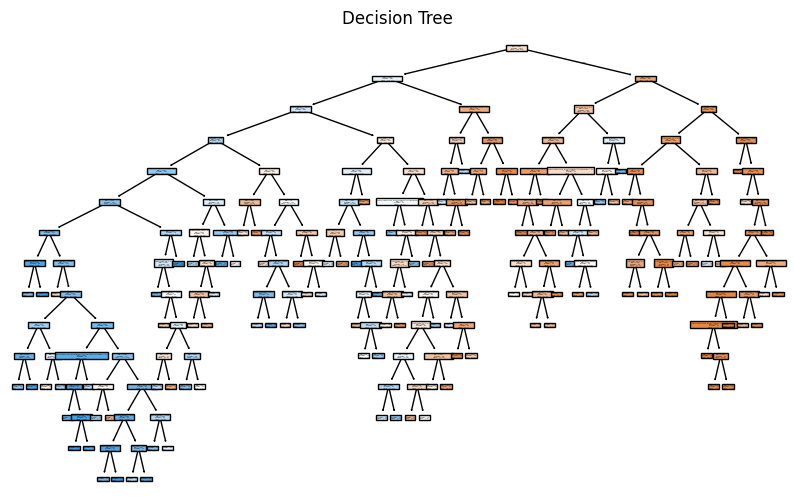

In [79]:
pred = DecisionTreeClassifier(min_samples_leaf=10, random_state=42)
pred.fit(X_train, Y_train)
y_hat = pred.predict(X_test)

plt.figure(figsize = (10, 6))
plot_tree(pred, filled = True, feature_names = X.columns)
plt.title('Decision Tree')
plt.show()

In [81]:
tab = pd.crosstab(Y_test, y_hat)
print(tab)

col_0                    Deceased  Living
Overall Survival Status                  
Deceased                      163      60
Living                         73      81


The algorithm got 244 correct, which is an accuracy of 64.7%.

4. For your model in part three, compute three statistics:

The true positive rate or sensitivity:
TPR=TPTP+FN
The true negative rate or specificity:
TNR=TNTN+FP
Does your model tend to perform better with respect to one of these metrics?

In [82]:
TPR = 81/(81+60)
TNR = 163/(163+73)
print('TPR:', TPR)
print('TNR:', TNR)

TPR: 0.574468085106383
TNR: 0.690677966101695


My model tends to perform better with respect to true negative rate.

5. Let's predict Overall Survival (Months) given the features/covariates  X . Use the train/test split to pick the optimal min_samples_leaf value that gives the highest  R2  on the test set (it's about 110). What is the  R2 ? Plot the test values against the predicted values. How do you feel about this model for clinical purposes?

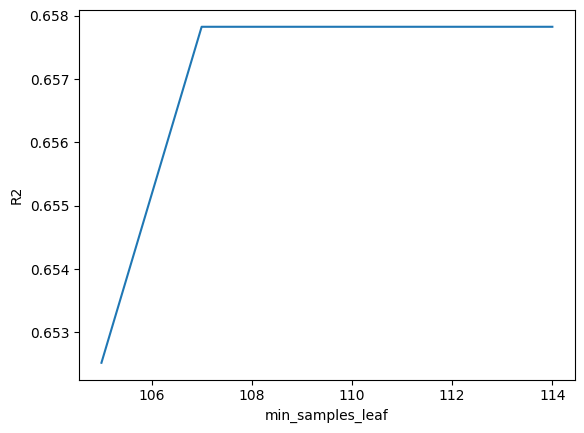

In [84]:
min_samples_leaf_size = range(105, 115)
r2_scores = []

for min_samples_leaf in min_samples_leaf_size:
  pred_ = DecisionTreeClassifier(min_samples_leaf=min_samples_leaf, random_state=42)
  pred_.fit(X_train, Y_train)
  pred_.score(X_test, Y_test)
  r2_scores.append(pred_.score(X_test, Y_test))

plt.plot(min_samples_leaf_size, r2_scores)
plt.xlabel('min_samples_leaf')
plt.ylabel('R2')
plt.show()

In [85]:
pred_ = DecisionTreeClassifier(min_samples_leaf=107, random_state=42)
pred_.fit(X_train, Y_train)
y_hat = pred_.predict(X_test)
print('R2:', pred_.score(X_test, Y_test))

R2: 0.6578249336870027


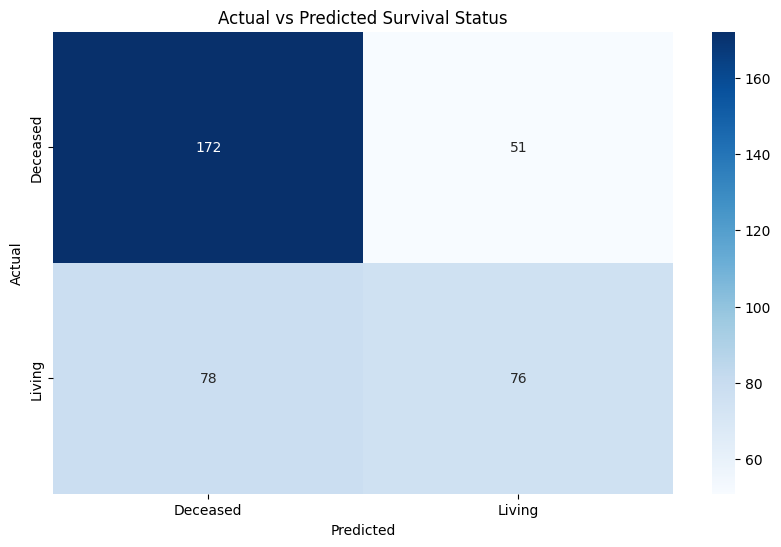

In [93]:
tab2 = pd.crosstab(Y_test, y_hat, rownames = ['Actual'], colnames = ['Predicted'])

plt.figure(figsize = (10, 6))
sns.heatmap(tab2, annot=True, fmt='d', cmap='Blues')
plt.title('Actual vs Predicted Survival Status')
plt.show()

For clinical purposes I feel that this model is not that great. I mean the prediction rate for both deceased and living are not more than 70%, which does not exactly instill confidence that you can trust the prediction from the model.

**Q4.** This is a case study about trees using bond rating data. This is a dataset about bond ratings for different companies, alongside a bunch of business statistics and other data. Companies often have multiple reviews at different dates. We want to predict the bond rating (AAA, AA, A, BBB, BB, B, ..., C, D). Do business fundamentals predict the company's rating?

1. Load the `./data/corporate_ratings.csv` dataset. How many observations and variables does it contain? Print out the first few rows of data.

2.  Plot a histogram of the `ratings` variable. It turns out that the gradations of AAA/AA/A and BBB/BB/B and so on make it hard to get good results with trees. Collapse all AAA/AA/A ratings into just A, and similarly for B and C.

3. Use all of the variables **except** Rating, Date, Name, Symbol, and Rating Agency Name. To include Sector, make a dummy/one-hot-encoded representation and include it in your features/covariates. Collect the relevant variables into a data matrix $X$.

4. Do a train/test split of the data and use a decision tree classifier to predict the bond rating. Including a min_samples_leaf constraint can raise the accuracy and speed up computation time. Print a confusion matrix and the accuracy of your model. How well do you predict the different bond ratings?

5. If you include the rating agency as a feature/covariate/predictor variable, do the results change? How do you interpret this?

**Q5.** This is a case study about detecting fraud using classification trees. The goal is to predict the `class` variable, which is 0 for non-fraud and 1 for fraud.

1. Open `./data/creditcard_fraud.csv`. Print the number of observations and variables, and look at the first few rows of data. The variables are already normalized and de-identified, and are just called things like `V8` to protect the privacy of the clients.

2. Print a table of counts for the `class` variable and make a histogram. What percentage of transactions are fraudulent?

3. Drop `Time` and make a decision tree classifier to predict fraud. Print a confusion table and compute the accuracy. This is a serious **class imbalance** problem: The minority class is so small that essentially predicting 0's for all cases will achieve an extremely high accuracy. There are over-sampling techniques to deal with this issue, but we don't have time to cover them in class.

4. Imagine that you block every transaction in the test set labelled as fraudulent. How much money is (1) saved that should be saved, (2) lost to fraud anyway, (3) withheld in error from customers? Does implementing this anti-fraud system seem like a good idea, or not? Why?

5. Instead of predicting fraud, predict loss: Multiple the `Class` variable times the `Amount` variable, and call it `Loss`. Predict it using a decision tree regressor (making sure to drop Class, Time, and Loss from the features/covariates/predictors). What $R^2$ and RMSE do you get? Make a scatterplot of the predicted values on the test group versus the actual test values. Do you notice any interesting patterns? How could you use this algorithm to decide which transactions to block, and why?


**Q6.** Show that any decision tree is equivalent to a linear regression on a set of dummy variables that represent the optimal splits in the tree.

Hint: You can think of CART as partitioning the feature space into a set of sets $\{S_1, S_2, ..., S_K\}$, and then predicting the average for all of the observations in each set $S_k$, $m_k$:
$$
\hat{y}(x) = \sum_{k=1}^K \mathbb{I}\{ x \text{ is in } S_k \} m_k
$$
where $\mathbb{I} \{ P(x,k)\}$ takes the value 1 if the proposition $P(x,k)$ is true and 0 otherwise. Now, doesn't that look like least-squares regression on a set of dummy/one-hot-encoded variables?

Conversely, can any linear regression be represented by a tree?